# Learning matplotlib

The purpose of this notebook is to learn how to do matplotlib graphs.

In [1]:
from matplotlib.ticker import NullFormatter, NullLocator
from matplotlib.dates import DateFormatter, DayLocator
from numpy.polynomial import polynomial as nppoly
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import matplotlib.cm as cm
import datasense as ds
import pandas as pd

In [2]:
%matplotlib inline
%config InlineBackend.figure_format ='svg'
c = cm.Paired.colors
figure_width_height = (8, 6)

In [3]:
def despine(ax: axes.Axes) -> None:
    '''
    Remove the top and right spines of a graph.

    There is only one x axis, on the bottom, and one y axis, on the left.
    '''
    for spine in 'right', 'top':
        ax.spines[spine].set_visible(False)

In [4]:
df = ds.read_file(
    filename='weight.csv',
    abscissa='Date'
)

# Single figure, single axes

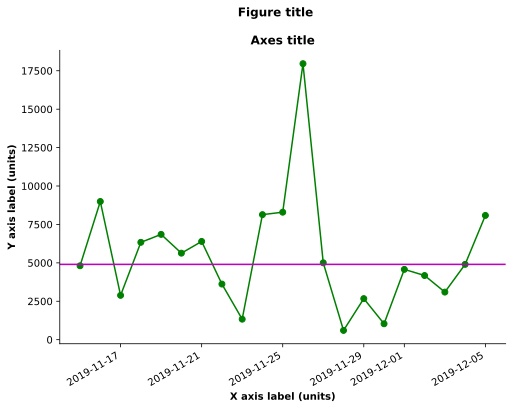

In [5]:
fig_title = 'Figure title'
axes_title = 'Axes title'
x_axis_label = 'X axis label (units)'
y_axis_label = 'Y axis label (units)'
fig = plt.figure(figsize=figure_width_height)
ax = fig.add_subplot(111)
fig.suptitle(fig_title, fontweight='bold')
ax.plot(df['Date'], df['Steps'],
        marker='o', linestyle='-', color='g')
ax.axhline(y=df['Steps'].median(), color='m')
ax.set_ylabel(y_axis_label, fontweight='bold')
ax.set_xlabel(x_axis_label, fontweight='bold')
ax.set_title(axes_title, fontweight='bold')
ds.format_dates(
    fig=fig,
    ax=ax
)
despine(ax)

## Single figure, single axes, left y axis, right y axis

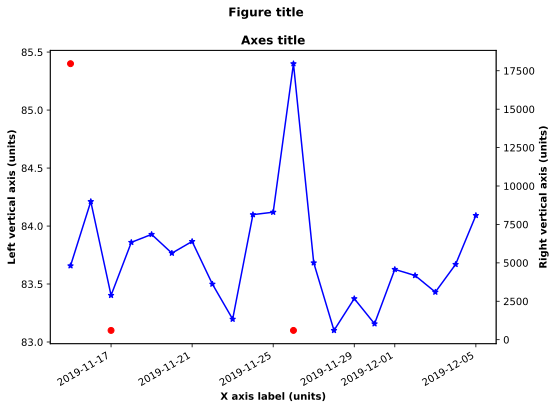

In [6]:
fig_title = 'Figure title'
axes_title = 'Axes title'
x_axis_label = 'X axis label (units)'
left_y_axis_label = 'Left vertical axis (units)'
right_y_axis_label = 'Right vertical axis (units)'
fig, ax1 = plt.subplots(figsize=figure_width_height)
fig.suptitle(fig_title, fontweight='bold')
ax1.set_title(axes_title, fontweight='bold')
ax1.plot(df['Date'], df['Actual'],
         marker='o', linestyle='None', color='r')
ax1.set_ylabel(left_y_axis_label, fontweight='bold')
ax1.set_xlabel(x_axis_label, fontweight='bold')
ax2 = ax1.twinx()
ax2.plot(df['Date'], df['Steps'],
         marker='*', linestyle='-', color='b')
ax2.set_ylabel(right_y_axis_label, fontweight='bold')
ds.format_dates(
    fig=fig,
    ax=ax
)

## Single figure, two axes

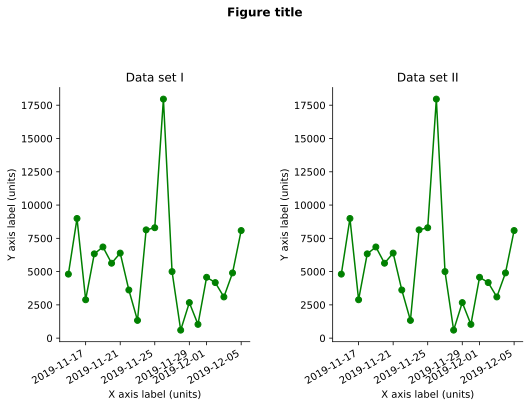

In [7]:
axes_title = [('Data set I', 'Data set II')]
fig = plt.figure(figsize=figure_width_height)
fig.suptitle(fig_title, fontweight='bold')
# for item, num in zip(range(0, 1), range(1, 3)):
#     ax = fig.add_subplot(1, 2, num)
#     ax.plot(
#         df['Date'],
#         df['Steps'],
#         marker='o',
#         linestyle='-',
#         color='g'
#     )
#     ax.set_title(axes_title[item])
#     ax.set_ylabel(y_axis_label)
#     ax.set_xlabel(x_axis_label)
#     ds.format_dates(
#         fig=fig,
#         ax=ax
#     )
gs = GridSpec(1, 2, figure=fig)
for i in range(1):
    for j in range(2):
        ax = fig.add_subplot(gs[i, j])
        ax.plot(
            df['Date'],
            df['Steps'],
            marker='o',
            linestyle='-',
            color='g'
        )
        ax.set_title(axes_title[i][j])
        ax.set_ylabel(y_axis_label)
        ax.set_xlabel(x_axis_label)
        despine(ax)
    ds.format_dates(
        fig=fig,
        ax=ax
    )
plt.tight_layout(pad=3)

## Single figure, four axes

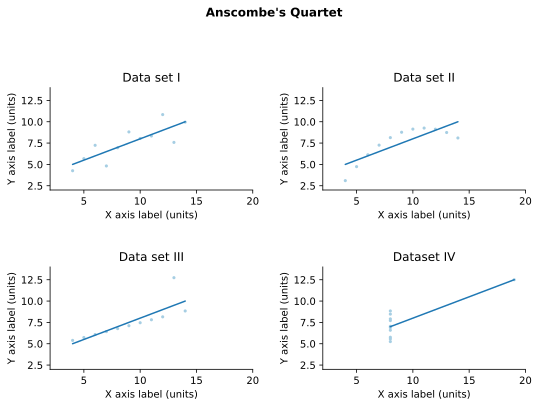

In [8]:
aq1 = pd.read_csv('aq1.csv')
aq2 = pd.read_csv('aq2.csv')
aq3 = pd.read_csv('aq3.csv')
aq4 = pd.read_csv('aq4.csv')
df = [(aq1, aq2), (aq3, aq4)]
xlim = [2, 20]
ylim = [2, 14]
fig_title = "Anscombe's Quartet"
ax_title = [('Data set I', 'Data set II'), ('Data set III', 'Dataset IV')]
fig = plt.figure(figsize=figure_width_height)
fig.suptitle(fig_title, fontweight='bold')
gs = GridSpec(2, 2, figure=fig)
for i in range(2):
    for j in range(2):
        ax = fig.add_subplot(gs[i, j])
        ax.scatter(df[i][j]['x'], df[i][j]['y'], color=c[0], linewidth=0,
                   linestyle="-", s=10, label="I")
        b, m = nppoly.polyfit(df[i][j]['x'], df[i][j]['y'], 1)
        ax.plot(df[i][j]['x'], m*df[i][j]['x'] + b, '-', color=c[1])
        ax.set_ylim(ylim)
        ax.set_xlim(xlim)
        ax.set_title(ax_title[i][j])
        ax.set_ylabel(y_axis_label)
        ax.set_xlabel(x_axis_label)
        despine(ax)
plt.tight_layout(pad=3)